# 📝 Exercise M7.01

In this exercise we will define dummy classification baselines and use them as
reference to assess the relative predictive performance of a given model of
interest.

We illustrate those baselines with the help of the Adult Census dataset, using
only the numerical features for the sake of simplicity.

In [2]:
import pandas as pd

adult_census = pd.read_csv("../datasets/adult-census-numeric-all.csv")
data, target = adult_census.drop(columns="class"), adult_census["class"]

First, define a `ShuffleSplit` cross-validation strategy taking half of the
samples as a testing at each round. Let us use 10 cross-validation rounds.

In [5]:
# Write your code here.
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.5, random_state=0)

Next, create a machine learning pipeline composed of a transformer to
standardize the data followed by a logistic regression classifier.

In [6]:
# Write your code here.
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

lr_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=500))

Compute the cross-validation (test) scores for the classifier on this dataset.
Store the results pandas Series as we did in the previous notebook.

In [7]:
# Write your code here.
import pandas as pd
from sklearn.model_selection import cross_val_score

lr_cv_results = cross_val_score(lr_model, data, target, cv=cv, n_jobs=2)
lr_cv_results = pd.Series(lr_cv_results, name="Logistic Regression")

Now, compute the cross-validation scores of a dummy classifier that constantly
predicts the most frequent class observed the training set. Please refer to
the online documentation for the [sklearn.dummy.DummyClassifier
](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
class.

Store the results in a second pandas Series.

In [23]:
# Write your code here.
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()

dummy_cv_results = cross_val_score(dummy, data, target, cv=cv, n_jobs=2)
dummy_cv_results = pd.Series(dummy_cv_results, name="Dummy Classifier ("+dummy.get_params()['strategy']+")")

Now that we collected the results from the baseline and the model, concatenate
the test scores as columns a single pandas dataframe.

In [24]:
# Write your code here.
all_errors = pd.concat(
    [lr_cv_results, dummy_cv_results],
    axis=1,
)
all_errors

,Logistic Regression,Dummy Classifier (prior)
0,0.815937,0.760329
1,0.813849,0.756808
2,0.815036,0.759142
3,0.815569,0.760739
4,0.810982,0.761681
5,0.814709,0.761885
6,0.813112,0.757463
7,0.810327,0.757176
8,0.812416,0.761885
9,0.816388,0.763114



Next, plot the histogram of the cross-validation test scores for both models
with the help of [pandas built-in plotting
function](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#histograms).

What conclusions do you draw from the results?

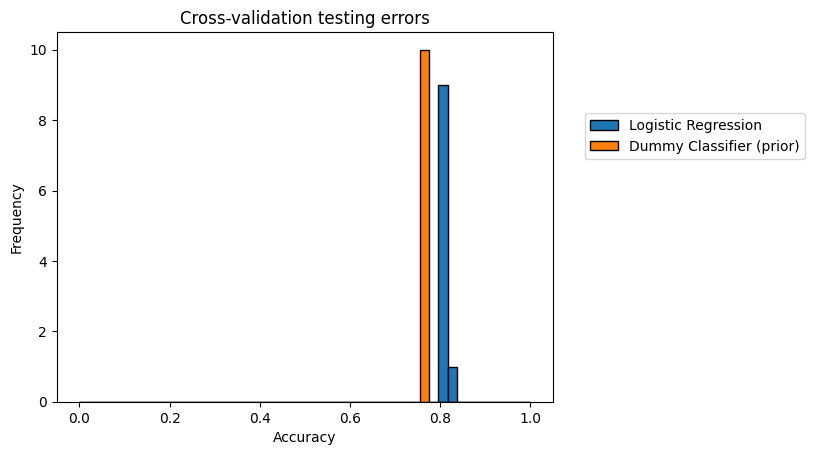

In [25]:
# Write your code here.
import matplotlib.pyplot as plt
import numpy as np

bins = np.linspace(start=0, stop=1, num=50)
all_errors.plot.hist(bins=bins, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Accuracy")
_ = plt.title("Cross-validation testing errors")

We realize that `LogisticRegression` performs a bit better than `DummyClassifier`.

Change the `strategy` of the dummy classifier to `"stratified"`, compute the
results. Similarly compute scores for `strategy="uniform"` and then the  plot
the distribution together with the other results.

Are those new baselines better than the previous one? Why is this the case?

Please refer to the scikit-learn documentation on
[sklearn.dummy.DummyClassifier](
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
to find out about the meaning of the `"stratified"` and `"uniform"`
strategies.

In [26]:
# Write your code here.
strategies = ['stratified', 'uniform']

for strategy in strategies:
    dummy.set_params(strategy=strategy)
    dummy_cv_results = cross_val_score(dummy, data, target, cv=cv, n_jobs=2)
    dummy_cv_results = pd.Series(dummy_cv_results, name="Dummy Classifier ("+dummy.get_params()['strategy']+")")
    all_errors = pd.concat([all_errors, dummy_cv_results], axis=1)
    
all_errors

,Logistic Regression,Dummy Classifier (prior),Dummy Classifier (stratified),Dummy Classifier (uniform)
0,0.815937,0.760329,0.640228,0.501085
1,0.813849,0.756808,0.635969,0.499202
2,0.815036,0.759142,0.640883,0.495066
3,0.815569,0.760739,0.631915,0.497277
4,0.810982,0.761681,0.632079,0.496867
5,0.814709,0.761885,0.633512,0.495680
6,0.813112,0.757463,0.636788,0.502314
7,0.810327,0.757176,0.633348,0.505221
8,0.812416,0.761885,0.639040,0.502846
9,0.816388,0.763114,0.630195,0.500061


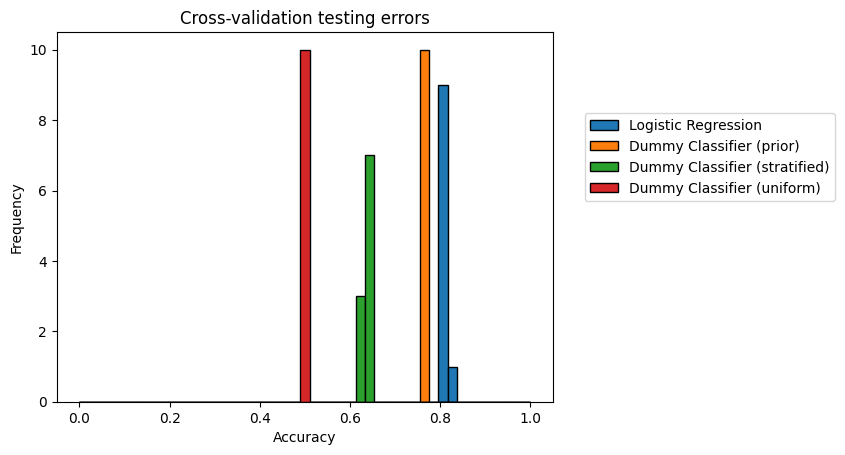

In [27]:
all_errors.plot.hist(bins=bins, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Accuracy")
_ = plt.title("Cross-validation testing errors")

No, those baselines are not better. `stratified` and `uniform` strategies randomize the output, while `prior` returns a constant output.